# **Examen final de Desarrollo de Aplicaciones para la Visualización de Datos**

Nombre: María 

Apellidos: Oliva Calero

Tiempo: *2 horas y 30 minutos*

## **Contexto del ejercicio**

Un banco portugues desea entender en más detalle las campañas de marketing directo que ha realizado en los últimos meses a más de 40 mil clientes. Las campañas de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente, para saber si el producto (depósito bancario) sería ('sí') o no ('no') contratado.

El objetivo del análisis es buscar patrones para entender mejor que tipo de perfil tienen los clientes que han contratado el depósito para buscar en su base de datos otros clientes parecidos para aumentar la respuesta y el ROI de futuras campañas de marketing directo intentando vender el mismo depósito. Por lo tanto, se pide:

1.  Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. (3 Puntos) (*)

2.  Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos) (*)

3. Concluir todo este análisis haciendo recomendaciones para la mejora de futuras campañas de contacto directo a partir de los resultados obtenidos de los análisis realizados con los datos. (2 Puntos)

Para realizar este análisis se provee de un juego de datos con las siguientes variables:

- age	- Edad (numérica)
- job - Ocupación (categórica)
- marital - Estado civil (categórica)
- education - Nivel educativo (categórica)
- default - ¿Tiene algún prestamo en default? (binaria)
- balance - Balance medio anual en euros (numérica)
- housing - ¿Tiene una hipoteca? (binaria)
- loan -  ¿Tiene un prestamo personal? (binaria)
- contact - Tipo de contacto (categórica)
- day_of_week - Último día de la semana que fue contactado (fecha)
- month - Último mes que fue contactado (fecha)
- duration - Duración de la última vez que fue contactado en segundos (entera)
- campaign - Número de veces que fue contactado (numérica)
- pdays - Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica; -1 significa que el cliente no fue contactado previamente)
- previous - Número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto)
- poutcome - Resultado de la campaña de marketing anterior (categórica; 'failure','nonexistent','success')
- y - El cliente ha contratado el depósito (binaria, yes, no)

Recuerda, si tuvieras que programar una función, comenta los argumentos de entrada y salida. **Explica el orden que estás siguiendo a la hora de elegir las visualizaciones y comenta las conclusiones que vas sacando.**


**(*) IMPORTANTE**: Puedes elegir realizar un modelo de clasificación y realizar visualizaciones en torno a ese modelo en los primeros dos apartados. Esta parte no es obligatoria. El objetivo de la clasificación sería predecir si el cliente se suscribirá a un depósito bancario (variable y).








### **Librerías necesarias**

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np  

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import dash


from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_68180/1912245318.py:30: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_68180/1912245318.py:31: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### **Análisis descriptivos**

In [2]:
def info(df):
    print("this dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print("coloumns are: {}".format(df.columns))
    print(df.dtypes)
    print("there are NAs in the dataset: {}".format(df.isna().sum()))
    print(df.isna().sum())
    print(df.describe(include='all'))

In [3]:
df = pd.read_csv("bank-full.csv",sep=";",encoding="utf-8")
info(df)


this dataset has 45211 rows and 17 columns
coloumns are: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
there are NAs in the dataset: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
bala

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')


In [6]:
info(df)

this dataset has 45211 rows and 17 columns
coloumns are: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object
there are NAs in the dataset: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0


/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_68180/4239403916.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['y']).plot.bar()


<Axes: xlabel='y'>

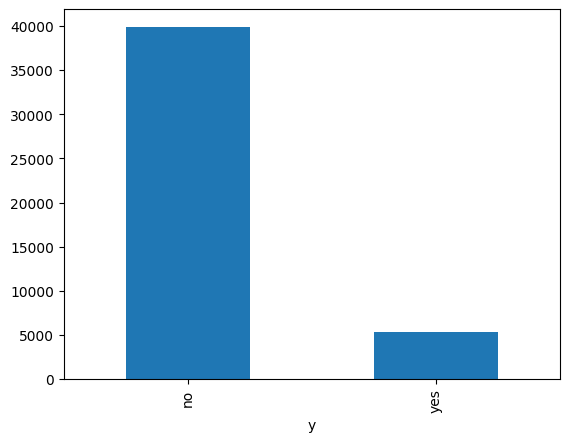

In [7]:
pd.value_counts(df['y']).plot.bar()

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)
px.imshow(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


In [9]:
#Hay que crear variables dummies para las variables categoricas

df_dummy = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_dummy.corr()
px.imshow(correlation_matrix)
## quiero investigar las amarilas mas a fondo 

In [10]:
#Hay que crear variables dummies para las variables categoricas

X = pd.get_dummies(df.drop(columns=['y']), drop_first=True)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf_log = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ("glm", LogisticRegression(max_iter=10000, tol=0.1)),
])

clf_log.fit(X_train, y_train)

predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))



Classification report
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7986
         yes       0.66      0.33      0.44      1057

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043

Confusion matrix
[[7807  179]
 [ 710  347]]


In [11]:

lmc = clf_log.named_steps['glm'].coef_

## Importancia de las variables
objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc[0]




fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x = objects,
    y = coefficients,
    name = "Coefficients importance",
    marker_color = "blue",
    orientation = "v"
))

fig1.update_layout(title = "GLM coefficients importance", xaxis_title = "Coeficientes normalizados", yaxis_title = "Variables")

fig1.show()


In [12]:
## vemos que los mas importantes son la duracion y cuando no se sabe el tipo de contacto que se ha tenido y el hecho de tener una hipoteca

In [13]:
pd.value_counts(df['contact'])

/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_68180/56470685.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [14]:
pd.value_counts(df['housing'])

/var/folders/d7/fq94_spj7t7185m44s3lzkrc0000gn/T/ipykernel_68180/2388276421.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



housing
yes    25130
no     20081
Name: count, dtype: int64

In [15]:
ages = px.histogram(df, x='age', color='y', nbins=20, barmode='group')
ages.update_layout(title='Influencia de la edad', xaxis_title='Age', yaxis_title='Count')
ages.show()

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [27]:
calls = px.box(df, y='duration', color='y')
calls.update_layout(title='Influencia de la duración de la última llamada', yaxis_title='Balance')
calls.show()
#la duracion influye bastante

/Users/mariaolivacalero/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Questions:

Which jobs types of customer are likely to subscribe term deposit?

Are Single or Married people more likely to subsrcibe term deposit?

Does education has any eddect on subscription of term deposit?


In [17]:
job_df = pd.DataFrame()
job_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
job_df['no'] = df[df['y'] == 'no']['job'].value_counts()

job = go.Figure()

job.add_trace(go.Bar(
    x = job_df.index,
    y = job_df['yes'],
    name = "Yes",
    marker_color = "red",
    orientation = "v"
))
job.add_trace(go.Bar(
    x = job_df.index,
    y = job_df['no'],
    name = "No",
    marker_color = "blue",
    orientation = "v"
))

job.update_layout(title = "Influencia del trabajo", xaxis_title = "Tipo de trabajo", yaxis_title = "Count")

In [18]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


app = dash.Dash(__name__)


app.layout = html.Div([   
    dcc.Dropdown(
        id='education-dropdown',
        options=[
            {'label': 'Primary', 'value': 'primary'},
            {'label': 'Secondary', 'value': 'secondary'},
            {'label': 'Tertiary', 'value': 'tertiary'},
            {'label': 'Unknown', 'value': 'unknown'}
        ],
        value='primary'
    ),
    html.Div(id='output-graph')
])


@app.callback(
    Output('output-graph', 'children'),
    Input('education-dropdown', 'value')
)
def update_graph(education):

    datos = df[df['education'] == education]["y"].value_counts()
    
    

    fig = go.Figure(data=[
        go.Pie(labels=datos.index, values=datos.values)
    ])
    
    fig.update_layout(title=f"Depósitos contratados para  {education} Education")
    return dcc.Graph(figure=fig)


if __name__ == '__main__':
    app.run_server(debug=True,port=5000)


In [19]:
print(df["contact"].value_counts())
print(df["poutcome"].value_counts())
print(df["previous"].value_counts())


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64
previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


voy a analizar el flujo de las llamadas que finalizan en contratacion 

In [20]:
df["contactados previamente"] = df["previous"] > 1
df["contactados previamente"].value_counts()

contactados previamente
False    39726
True      5485
Name: count, dtype: int64

In [21]:
df["campaña"] = df["campaign"] > 1
df["campaña"].value_counts()

campaña
True     27667
False    17544
Name: count, dtype: int64

In [22]:
contactados = df[df['contact'] == 'cellular']['contact'].value_counts()["cellular"]
print(contactados)

campaign = df[df['campaña'] == True]['campaña'].value_counts()[True]
print(campaign)

previamente = df[df['contactados previamente'] == True]['contactados previamente'].value_counts()[True]
print(previamente)

yes = df[df['y'] == 'yes']['y'].value_counts()["yes"]
print(yes)

29285
27667
5485
5289


In [45]:
stats = previamente / campaign *100
print(stats)


19.8250623486464


In [23]:
data = dict(
    number=[contactados, campaign, previamente, yes],
    stage=["Contactados","Sí se ha hecho campaña", "Contactados más de una vez", "Depósito Contratado"])
funnel = px.funnel(data, x='number', y='stage')
funnel.update_layout(title='Influencia de la campaña', xaxis_title='Número de personas', yaxis_title='Etapa')
funnel.show()

# Dashboard global


In [44]:
app = dash.Dash(__name__)


app.layout = html.Div([  
    html.H1("Análisis de datos bancarios"),
    dcc.Graph(figure=calls), 
    dcc.Dropdown(
        id='education-dropdown',
        options=[
            {'label': 'Primary', 'value': 'primary'},
            {'label': 'Secondary', 'value': 'secondary'},
            {'label': 'Tertiary', 'value': 'tertiary'},
            {'label': 'Unknown', 'value': 'unknown'}
        ],
        value='primary'
    ),
    html.Div(id='output-graph'),
    dcc.Graph(figure=ages),
    dcc.Graph(figure=funnel),
    dcc.Graph(figure=job)
])


@app.callback(
    Output('output-graph', 'children'),
    Input('education-dropdown', 'value')
)
def update_graph(education):

    datos = df[df['education'] == education]["y"].value_counts()
    
    

    fig = go.Figure(data=[
        go.Pie(labels=datos.index, values=datos.values)
    ])
    
    fig.update_layout(title=f"Depósitos contratados para  {education} Education")
    return dcc.Graph(figure=fig)


if __name__ == '__main__':
    app.run_server(debug=False,port=2000)


En primer lugar se ha realizado un modelo de clasificación para buscar las variables que más influyen en el hecho de contratar un depósito bancario. Para ello se ha realizado una matriz de correlación convirtiendo las variables categóricas en dummies y se ha entrenado un modelo sencillo.
Tras ello, se ha deidido dividir el análisis en dos:

Por una parte, se ha hecho un análisis demográfico de los clientes, en los que quería contestar a las siguientes preguntas:

1. Influye la edad en la contratación de un depósito?
2. Influe el nivel de educación ?(para esto se ha utilizado un callback)
3. Es importante el tipo de trabajo?

Por otro lado, me he querido centrar en la parte de las campañas que realiza el departamento de marketing del banco.
Una de las variables más influyentes de mi modelo era la duración de la llamada previa a la decisión de contratación y he podido comprobar que efectivamente hay una diferencia significativa entre la distribución de las llamadas que acaban en Sí y las que acaban en NO utilizando un gráfico de cajas.

Finalmente, he utilizado un gráfico de funnel para mostrar el flujo de las campañas que acaban en éxito, pudiendo comprobar que un 96% de las personas que son contactadas más de una vez acaban contratando el depósito. Sin embargo, solo un 19% de las personas contactadas, fueron contactadas más de una vez, por lo que la recomendación que haría al banco sería centrarse en el 81% de personas que pierden entre estos dos stages